# Importing libraries and Loading dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preparation.

- observing missing values and handling it.
- concatenating training and test

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### checking missing value for train

In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train['Credit_History'] = train['Credit_History'].fillna(method = 'bfill')
train['Credit_History'].value_counts()

1.0    517
0.0     97
Name: Credit_History, dtype: int64

In [8]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### heatmap for missing valuespresent in the training data

<AxesSubplot:>

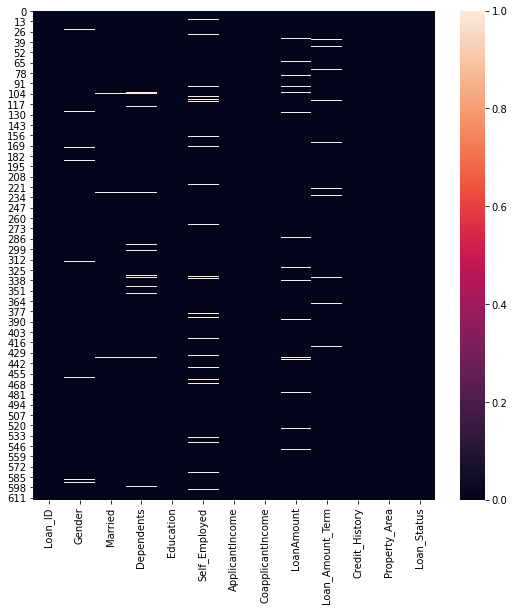

In [9]:
plt.figure(figsize = (9, 9))
sns.heatmap(train.isnull())

### handling missing value in train

In [10]:

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']= train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [11]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
train['Credit_History'].value_counts()

1.0    517
0.0     97
Name: Credit_History, dtype: int64

## test data

In [13]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### missing values for test data

<AxesSubplot:>

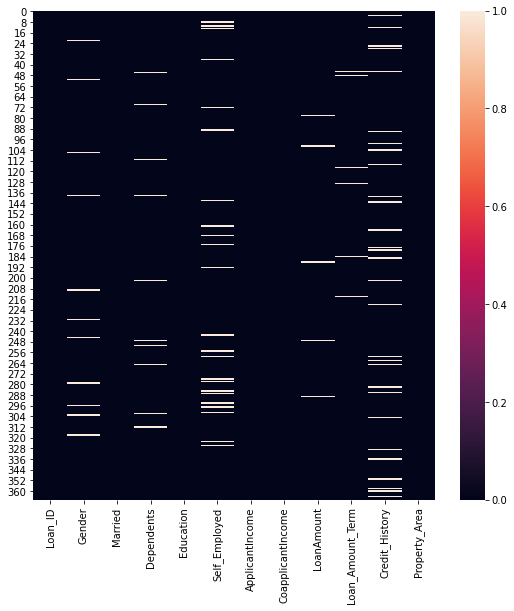

In [14]:
#missing values for test data
plt.figure(figsize = (9, 9))
sns.heatmap(test.isnull())

### missing values for test data

In [15]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### handling missing values for test data

In [16]:
#handling missing values for test data

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [17]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
print(test.shape)
print(train.shape)

(367, 12)
(614, 13)


### concatenating train and test

In [19]:
1#concatenating train and test
final_df = pd.concat([train, test], axis = 0)

In [20]:
final_df.shape

(981, 13)

In [21]:
final_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### handling categorical columns

In [22]:
#handling categorical columns
col = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status' ]

In [23]:
final_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
df = final_df.copy()

In [25]:
df['Loan_Status'].isnull().sum()
df["Loan_Status"] = df['Loan_Status'].fillna(df['Loan_Status'].mode()[0]) #filling missing values

# Exploratory Data analysis.
- Univariate analysis
- Bi- variate Analysis
- chi-sqaure test
- anova test

In [26]:
 df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

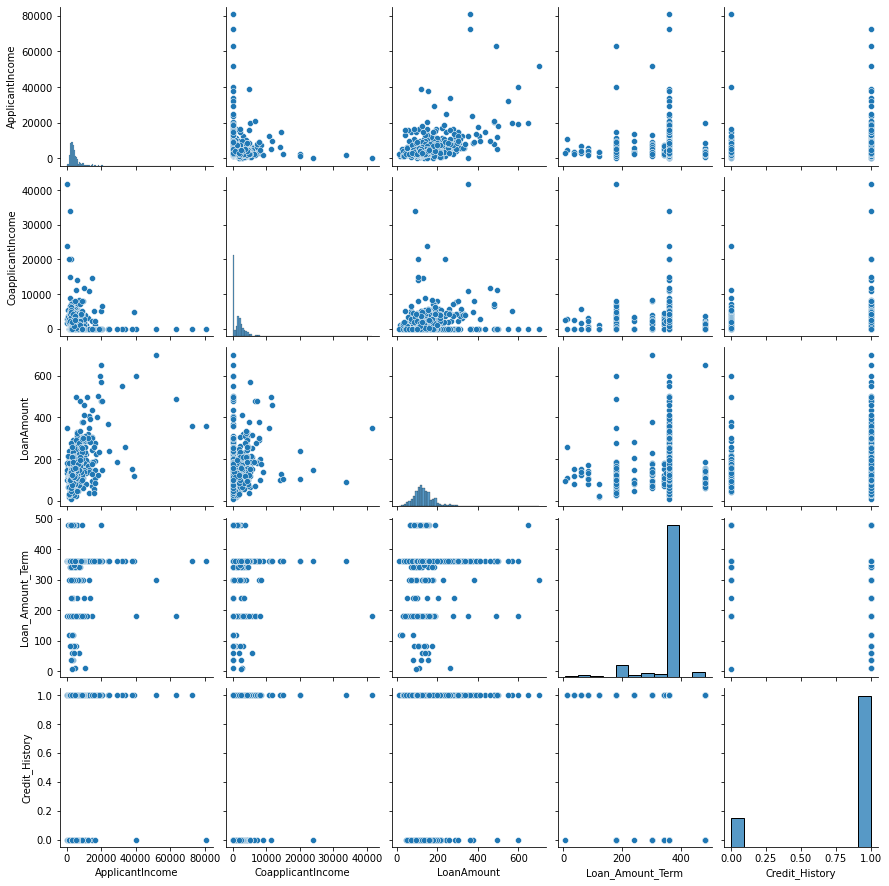

In [27]:
sns.pairplot(df)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.547036,-0.023101,0.026294
CoapplicantIncome,-0.114247,1.000000,0.178205,-0.042963,-0.004157
LoanAmount,0.547036,0.178205,1.000000,0.054238,0.003163
Loan_Amount_Term,-0.023101,-0.042963,0.054238,1.000000,-0.016356
Credit_History,0.026294,-0.004157,0.003163,-0.016356,1.000000


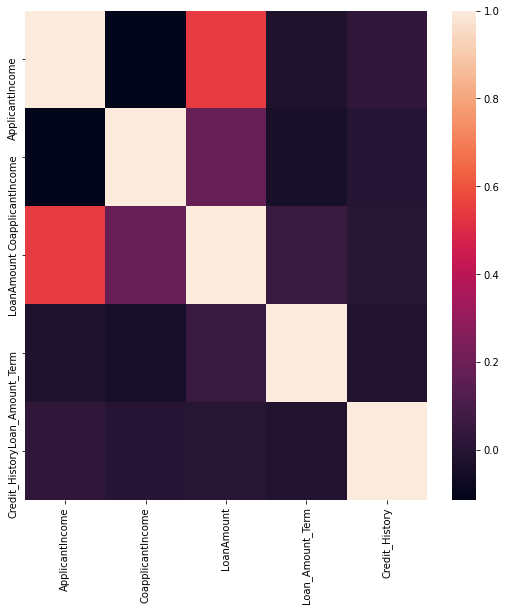

In [28]:
plt.figure(figsize = (9, 9))
sns.heatmap(df.corr())
df.corr()

- here, Applicant Income and Credit History shows a strong correlation.
- Applicant Income also shows an optimal correlation with loan amount
- Coapplicant is finely correlated with loan amount.
- loan amount term is optimally related to loan amount


### Univariate Analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

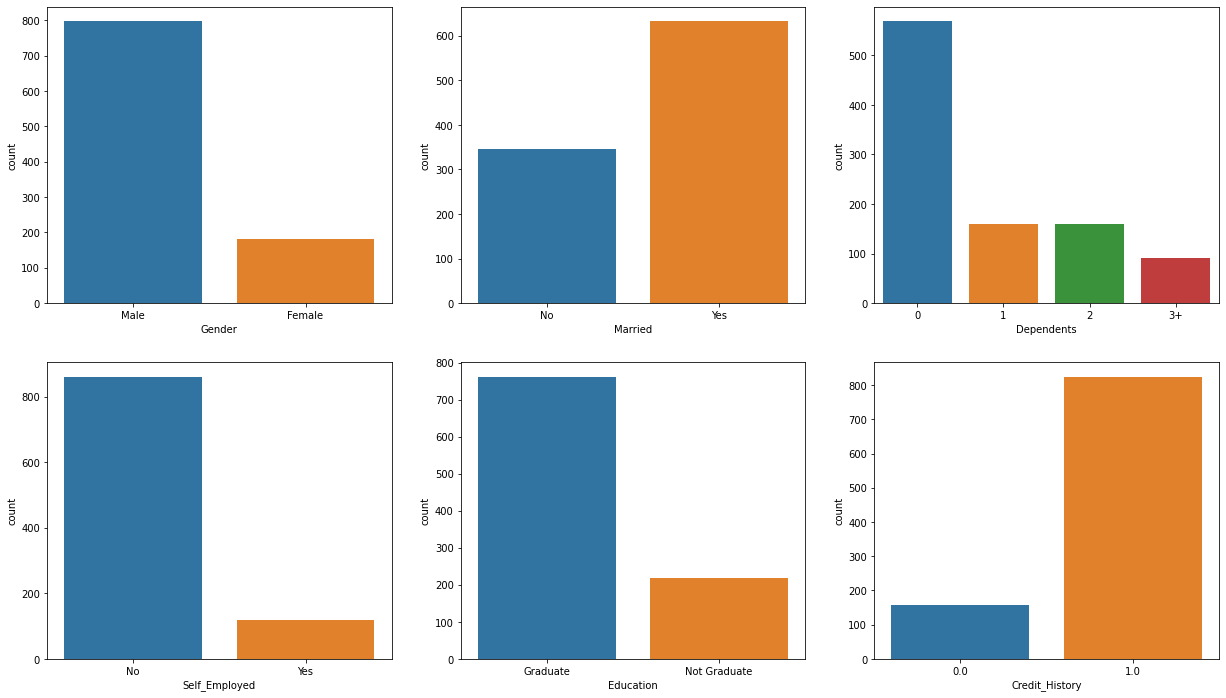

In [29]:
#for categorical
plt.figure(figsize = (21, 12))
plt.subplot(2, 3, 1)
sns.countplot(x = df["Gender"])

plt.subplot(2, 3, 2)
sns.countplot(x =df['Married'])

plt.subplot(2, 3, 3)
sns.countplot(x = df['Dependents'])

plt.subplot(2, 3, 4)
sns.countplot(x = df['Self_Employed'])

plt.subplot(2, 3, 5)
sns.countplot(x = df['Education'])

plt.subplot(2, 3, 6)
sns.countplot(x =df['Credit_History'])

- the number of Males are higher than females.
- count of married is more than non married.
- 0 dpeendents are maximal whereas 1 and 2 are equal .
- self employed is lesser compared to employed.
- The number of Graduates are more than Non Graduates.
- Credit history with 1.0 seems to be more.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

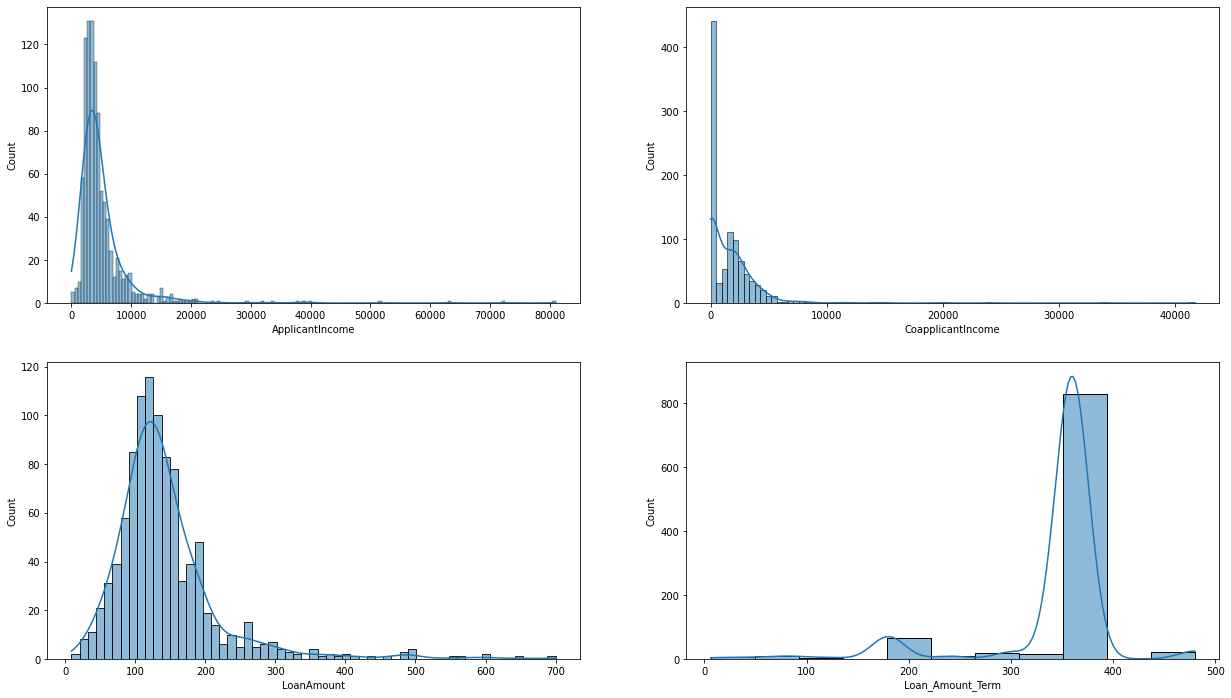

In [30]:
# for continous variable
plt.figure(figsize = (21, 12))
plt.subplot(2, 2, 1)
sns.histplot(x = df["ApplicantIncome"], kde = True)

plt.subplot(2, 2, 2)
sns.histplot(x =df['CoapplicantIncome'], kde = True)

plt.subplot(2, 2, 3)
sns.histplot(x = df['LoanAmount'], kde = True)

plt.subplot(2, 2, 4)
sns.histplot(x = df['Loan_Amount_Term'], kde = True)

<AxesSubplot:ylabel='Loan_Amount_Term'>

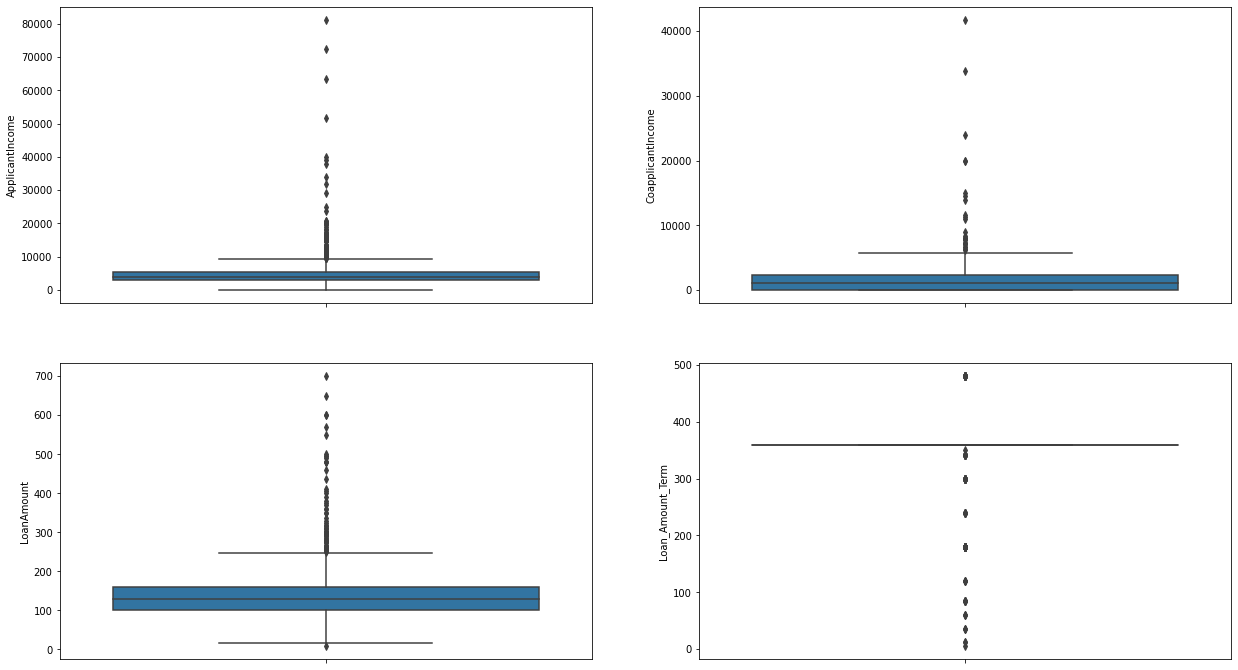

In [31]:
plt.figure(figsize = (21, 12))
plt.subplot(2, 2, 1)
sns.boxplot(y = df["ApplicantIncome"])

plt.subplot(2, 2, 2)
sns.boxplot(y =df['CoapplicantIncome'])

plt.subplot(2, 2, 3)
sns.boxplot(y = df['LoanAmount'])

plt.subplot(2, 2, 4)
sns.boxplot(y = df['Loan_Amount_Term'])

we can clearly see that it contains outliers.

### bi- variate analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

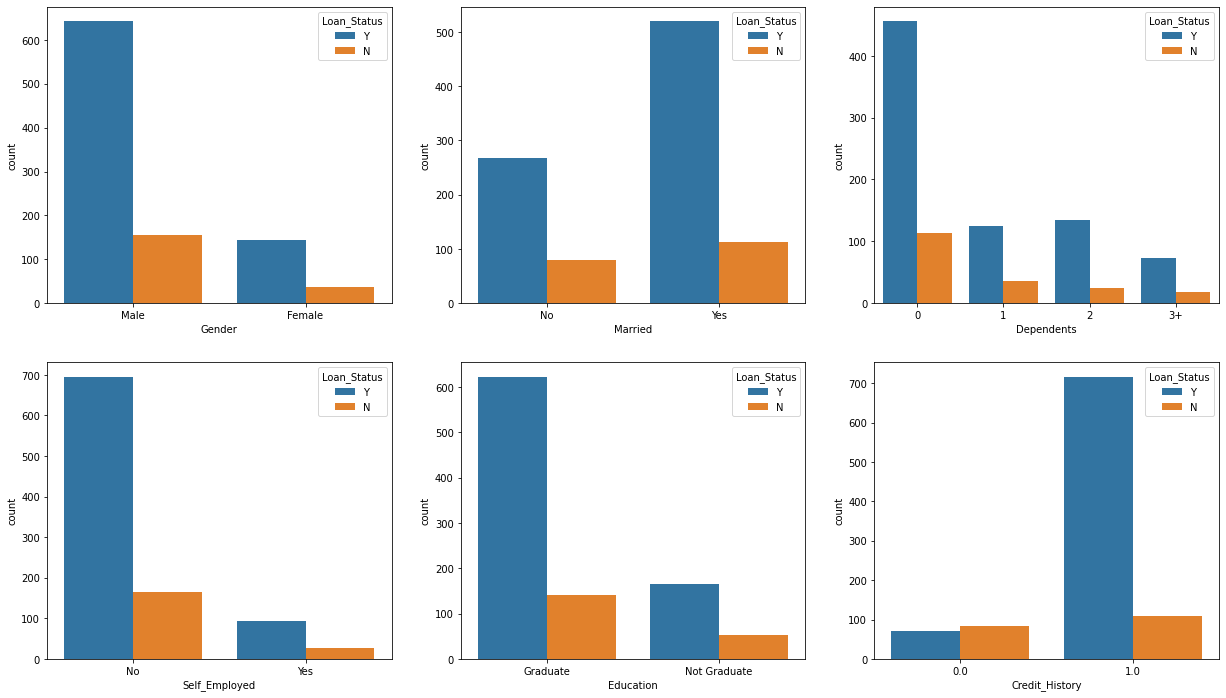

In [32]:
#bivariate analysis for categorical columns with loan status
plt.figure(figsize = (21, 12))
plt.subplot(2, 3, 1)
sns.countplot(x = df["Gender"], hue = df['Loan_Status'])

plt.subplot(2, 3, 2)
sns.countplot(x =df['Married'], hue = df['Loan_Status'])

plt.subplot(2, 3, 3)
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'])

plt.subplot(2, 3, 4)
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'])

plt.subplot(2, 3, 5)
sns.countplot(x = df['Education'], hue = df['Loan_Status'])

plt.subplot(2, 3, 6)
sns.countplot(x =df['Credit_History'], hue = df['Loan_Status'])

- In gender, There are more males than female.
- Married applicants are more likely to be approved 
- Loan Status for 0 dependents seems be more than the following.
- loan status for employed is in greater quantity than the self - employed.
- people who are not graduate are less likely to be approved for a loan than who are graduate.
- Credit History with 1.0 are more likely to be approved.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

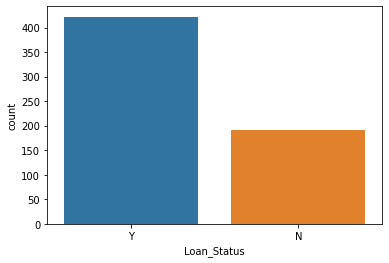

In [33]:
sns.countplot(x = final_df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

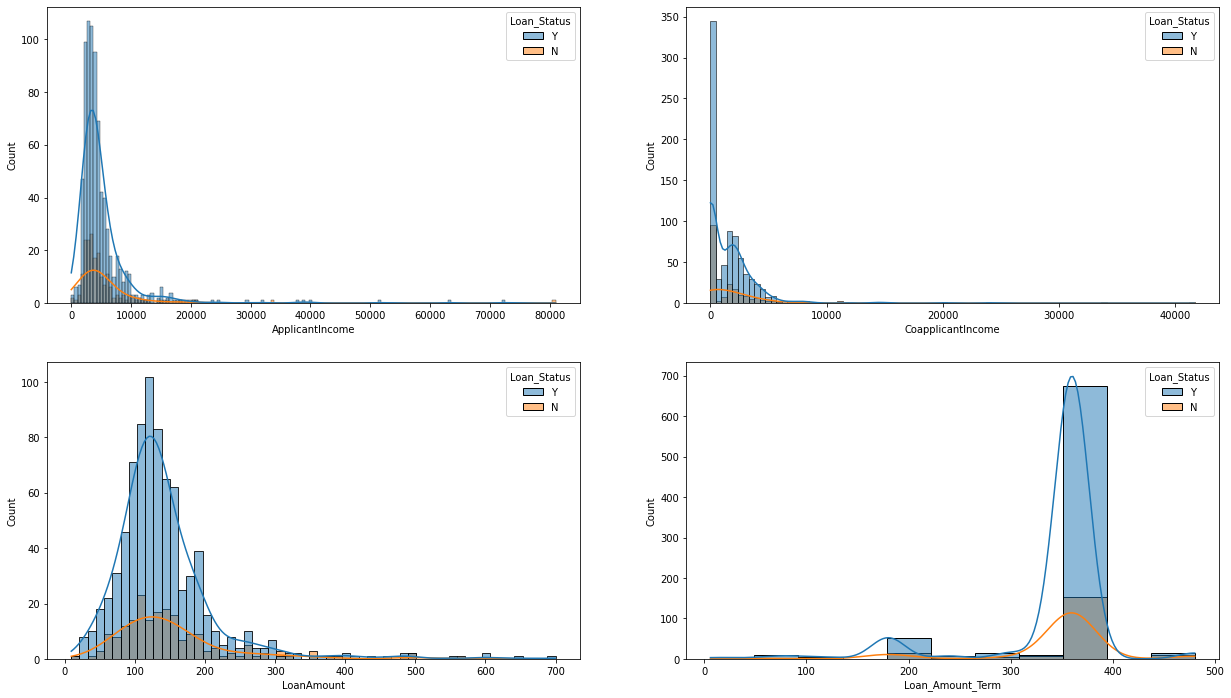

In [34]:
#continous variables with loan status
plt.figure(figsize = (21, 12))
plt.subplot(2, 2, 1)
sns.histplot(x = df["ApplicantIncome"], kde = True, hue = df['Loan_Status'])

plt.subplot(2, 2, 2)
sns.histplot(x =df['CoapplicantIncome'], kde = True, hue = df['Loan_Status'])

plt.subplot(2, 2, 3)
sns.histplot(x = df['LoanAmount'], kde = True, hue = df['Loan_Status'])

plt.subplot(2, 2, 4)
sns.histplot(x = df['Loan_Amount_Term'], kde = True, hue = df['Loan_Status'])

In [35]:
df['Loan_Status'].value_counts()
df = df.drop(['Loan_ID','Dependents'] ,axis = 1)
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [36]:
#handling categorical columns
# df_encoded = pd.get_dummies(df.iloc[:, 1:], drop_first = True)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,0,1,4009,1777.0,113.000000,360.0,1.0,2,1
363,1,1,1,0,4158,709.0,115.000000,360.0,1.0,2,1
364,1,0,1,0,3250,1993.0,126.000000,360.0,1.0,1,1
365,1,1,1,0,5000,2393.0,158.000000,360.0,1.0,0,1


In [37]:
x = df.iloc[:, 1:] #features
y = df.iloc[:, -1] #label


In [38]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [39]:
df
# df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,0,1,4009,1777.0,113.000000,360.0,1.0,2,1
363,1,1,1,0,4158,709.0,115.000000,360.0,1.0,2,1
364,1,0,1,0,3250,1993.0,126.000000,360.0,1.0,1,1
365,1,1,1,0,5000,2393.0,158.000000,360.0,1.0,0,1


In [40]:
# #train test split 
# from sklearn.model_selection import train_test_split
# df_encoded.to_csv('modify.csv')

#using QuantileTransformer isrobust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation

In [41]:
x = df.drop('Loan_Status', axis = 1)
y= df['Loan_Status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.2)

In [42]:

from sklearn.preprocessing import QuantileTransformer , StandardScaler, MinMaxScaler
std =StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)


## model selection

In [43]:
# df_encoded.columns

NameError: name 'df_encoded' is not defined

In [44]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
#metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [45]:
def model_selection(n):
    model = n
    print("Model name : ", model)
    model.fit(x_train , y_train)
    
    model_pred = model.predict(x_test)
    
    print("accuracy score: {}".format(accuracy_score(model_pred, y_test) * 100))
    print("confusion matrix : ", confusion_matrix(model_pred,y_test))

In [46]:
#xgboost
model_selection(XGBClassifier())

Model name :  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[22:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score: 79.18781725888326
confusion 

In [47]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model_selection(RandomForestClassifier())

Model name :  RandomForestClassifier()
accuracy score: 82.74111675126903
confusion matrix :  [[ 10   5]
 [ 29 153]]


In [48]:
#logisitc regression
model_selection(LogisticRegression())

Model name :  LogisticRegression()
accuracy score: 81.7258883248731
confusion matrix :  [[  7   4]
 [ 32 154]]


In [49]:
#hyperparameter tuning
#logistic regression
from sklearn.model_selection import GridSearchCV 

params = {'C':[10, 30, 50, 200,300, 400],'random_state':[100, 200, 300], "max_iter":[100, 200, 150, 50, 250, 300]}
grid1 = GridSearchCV(estimator = LogisticRegression(), param_grid = params, scoring = 'accuracy', cv = 5)
grid1.fit(x_train, y_train)
best_acc = grid1.best_score_
best_param = grid1.best_params_
print("best parameters: ", best_param)

print('best accuracy:', best_acc*100)


best parameters:  {'C': 30, 'max_iter': 100, 'random_state': 100}
best accuracy: 79.97550220480157


In [50]:
#xgbclassifier
from xgboost import XGBClassifier
params = {"learning_rate": [0.01, 0.1], 'eval_metric': ['error']}
grid4 = GridSearchCV(estimator = XGBClassifier(), param_grid = params , scoring = "accuracy", cv = 10)
grid4.fit(x_train, y_train)
best_Acc = grid4.best_score_
best_param = grid4.best_params_

print("best accuracy :", best_Acc*100)
print("best parameters : ", best_param)


best accuracy : 81.89873417721518
best parameters :  {'eval_metric': 'error', 'learning_rate': 0.01}


#### trying Logistic Regression as well as XGBClassifier.

In [51]:
#fitting model for logistic regression
model = LogisticRegression(C = 10, max_iter = 100, random_state =100)
model.fit(x_train , y_train)
    
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
    
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("\n")
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.18      0.28        39
           1       0.83      0.97      0.90       158

    accuracy                           0.82       197
   macro avg       0.73      0.58      0.59       197
weighted avg       0.79      0.82      0.77       197



ROC AUC score: 0.7752353132099967
Accuracy Score:  0.817258883248731


In [52]:
x =model.predict(x_train)
print("accuracy for training data : ", accuracy_score(x, y_train))

y = model.predict(x_test)
print("accuracy for test data: ", accuracy_score(y, y_test))

accuracy for training data :  0.8073979591836735
accuracy for test data:  0.817258883248731


In [53]:
#XGB classifier
model  =XGBClassifier(eval_metric = 'error', learning_rate = 0.01)
model.fit(x_train , y_train)
    
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
    
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("\n")
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.26      0.36        39
           1       0.84      0.96      0.90       158

    accuracy                           0.82       197
   macro avg       0.73      0.61      0.63       197
weighted avg       0.80      0.82      0.79       197



ROC AUC score: 0.6706426484907498
Accuracy Score:  0.8223350253807107


In [54]:
x =model.predict(x_train)
print("accuracy for training data : ", accuracy_score(x, y_train))

y = model.predict(x_test)
print("accuracy for test data: ", accuracy_score(y, y_test))

accuracy for training data :  0.8801020408163265
accuracy for test data:  0.8223350253807107


- We Can Clearly see that Logistic Regression is performing better on both Training data as well as validation data.
 
- Therefore, moving forward with Logistic Regression.

In [55]:
#fitting xgboost
model = LogisticRegression(C = 10, max_iter = 100, random_state =100)
model.fit(x_train , y_train)
    
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
    
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("\n")
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.18      0.28        39
           1       0.83      0.97      0.90       158

    accuracy                           0.82       197
   macro avg       0.73      0.58      0.59       197
weighted avg       0.79      0.82      0.77       197



ROC AUC score: 0.7752353132099967
Accuracy Score:  0.817258883248731


In [56]:
x =model.predict(x_train)
print("accuracy for training data : ", accuracy_score(x, y_train))

y = model.predict(x_test)
print("accuracy for test data: ", accuracy_score(y, y_test))

accuracy for training data :  0.8073979591836735
accuracy for test data:  0.817258883248731


####  Logistic regression performed better, with good accuracy score.

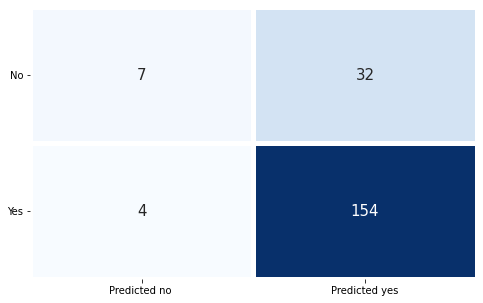

Text(0.5, 0, 'False Positive Rate')

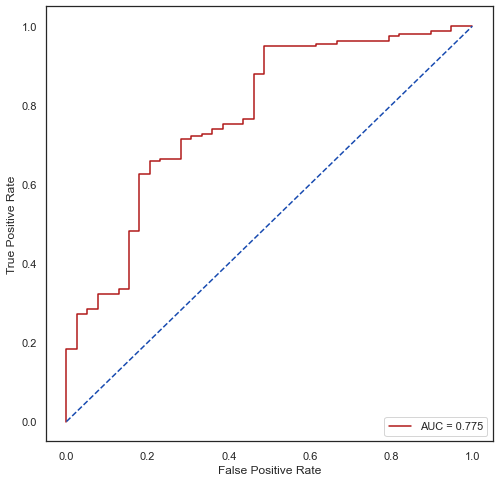

In [57]:
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No', 'Yes'], xticklabels = ['Predicted no ', 'Predicted yes'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [58]:
x = model.predict(x_test)
accuracy_score(x, y_test) #accuracy of test data

0.817258883248731

#### After hypertuning parameters and fitting the XGBclassifier, we get  nearly 82% accuracy.

# saving model

In [59]:
import pickle 
filename = 'loan5.pkl'
pickle.dump(model, open(filename, 'wb'))